# Part 0: Hello Qiskit

While skip talking about how a quantum computer is important and hot in recent days, let's jump into the quantum circuit directly by using Qiskit.

Qiskit is an open-source SDK for working with quantum computers at the level of pulses, circuits, and algorithms. Qiskit supports many quantum backends - IBM Quantum, IonQ, AQT, Honeywell and etc and quantum cloud - IBM Quantum Experience, Microsoft Azure Quantum. Qiskit's great contribution to the quantum computing ecosystem is its huge and active developer community and we will talk about this at the 29th Oct lecture.

With this 1st lecture, we will demonstrate:

- Part 1: Qiskit Basic (10min)
    - Basic Quantum Gates and Operations
    - Exercise: Quantum State manipulating with the gates - Bell State
- Part 2: Tutorial with GHZ Circuit (30 min)
    - Compose 3-qubits GHZ quantum circuits
    - simulating them on various backends, and visualizing the results
- Part 3: Introduction of the Quantum Information Theory (30min)
    - Phase Kickback
    - the Deutsch Jozsa algorithm
- Exercise (20min):
    - explore easy physics model by using qiskit with assignment1

# Part1 : Qiskit Basic - Basic Quantum Gates and Operations

## Single Qubit Quantum states <a name="single_states"/>

A single qubit quantum state can be written as

$$\left|\psi\right\rangle = \alpha\left|0\right\rangle + \beta \left|1\right\rangle$$


where $\alpha$ and $\beta$ are complex numbers. In a measurement the probability of the bit being in $\left|0\right\rangle$ is $|\alpha|^2$ and $\left|1\right\rangle$ is $|\beta|^2$. As a vector this is

$$
\left|\psi\right\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}.
$$

Note, due to the conservation of probability $|\alpha|^2+ |\beta|^2 = 1$ and since global phase is undetectable $\left|\psi\right\rangle := e^{i\delta} \left|\psi\right\rangle$ we only require two real numbers to describe a single qubit quantum state.

A convenient representation is

$$\left|\psi\right\rangle = \cos(\theta/2)\left|0\right\rangle + \sin(\theta/2)e^{i\phi}\left|1\right\rangle$$

where $0\leq \phi < 2\pi$, and $0\leq \theta \leq \pi$.  From this, it is clear that there is a one-to-one correspondence between qubit states ($\mathbb{C}^2$) and the points on the surface of a unit sphere ($\mathbb{R}^3$). This is called the Bloch sphere representation of a qubit state.

Quantum gates/operations are usually represented as matrices. A gate which acts on a qubit is represented by a $2\times 2$ unitary matrix $U$. The action of the quantum gate is found by multiplying the matrix representing the gate with the vector which represents the quantum state.

$$\left|\psi'\right\rangle = U\left|\psi\right\rangle$$

A general unitary must be able to take the $\left|0\right\rangle$ to the above state. That is 

$$
U = \begin{pmatrix}
\cos(\theta/2) & a \\
e^{i\phi}\sin(\theta/2) & b 
\end{pmatrix}
$$ 

where $a$ and $b$ are complex numbers constrained such that $U^\dagger U = I$ for all $0\leq\theta\leq\pi$ and $0\leq \phi<2\pi$. This gives 3 constraints and as such $a\rightarrow -e^{i\lambda}\sin(\theta/2)$ and $b\rightarrow e^{i\lambda+i\phi}\cos(\theta/2)$ where $0\leq \lambda<2\pi$ giving 

$$
U = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix}.
$$

This is the most general form of a single qubit unitary.

Qiskit support many single-qubi gates. You can check the whole list of them at here: 
https://qiskit.org/textbook/ch-states/single-qubit-gates.html

The most frequent used  and famouse gate and it's matrix forms are examine below:

#### u gates

In Qiskit we give you access to the general unitary using the $u3$ gate

$$
u3(\theta, \phi, \lambda) = U(\theta, \phi, \lambda) 
$$


In [107]:
u_gate = QuantumCircuit(1)
u_gate.u(np.pi/2,np.pi/2,np.pi/2,0)
u_gate.draw()

┌────────────────┐
q_0: ┤ U(π/2,π/2,π/2) ├
     └────────────────┘

### Pauli gates

#### $X$: bit-flip gate

The bit-flip gate $X$ is defined as:

$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}= u3(\pi,0,\pi)
$$

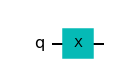

In [108]:
x_gate=QuantumCircuit(1) # Create a quantum circuit with 1 qubit
x_gate.x(0)
x_gate.draw(output='mpl')

#### $Y$: bit- and phase-flip gate

The $Y$ gate is defined as:

$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}=u3(\pi,\pi/2,\pi/2)
$$

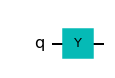

In [109]:
y_gate = QuantumCircuit(1)
y_gate.y(0)  
y_gate.draw(output='mpl')

#### $Z$: phase-flip gate

The phase-flip gate $Z$ is defined as:

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}=u1(\pi)
$$

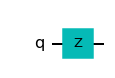

In [110]:
z_gate = QuantumCircuit(1)
z_gate.z(0)  
z_gate.draw(output='mpl')

### Clifford gates
the Clifford gates are the elements of the Clifford group, a set of mathematical transformations which effect permutations of the Pauli operators.

#### Hadamard gate

A Hadamard gate represents a rotation of $\pi$ about the axis that is in the middle of the X-axis and Z-axis.
It maps the basis state $|0\rangle$ to $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$, which means that a measurement will have equal probabilities of being `1` or `0`, creating a 'superposition' of states. This state is also written as $|+\rangle$. What the Hadamard does is to transform between the $|0\rangle$ $|1\rangle$ and the $|+\rangle$ $|-\rangle$ base. 

$$
H = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}= u2(0,\pi)
$$

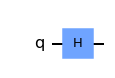

In [111]:
# Let's do an H-gate on a |0> qubit
h_gate = QuantumCircuit(1)
h_gate.h(0)
h_gate.draw(output='mpl')

#### $S$ (or, $\sqrt{Z}$ phase) gate

$$
S = 
\begin{pmatrix}
1 & 0\\
0 & i
\end{pmatrix}= u1(\pi/2)
$$

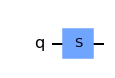

In [113]:
s_gate = QuantumCircuit(1)
s_gate.s(0)
s_gate.draw(output='mpl')

#### $S^{\dagger}$ (or, conjugate of $\sqrt{Z}$ phase) gate

$$
S^{\dagger} = 
\begin{pmatrix}
1 & 0\\
0 & -i
\end{pmatrix}= u1(-\pi/2)
$$


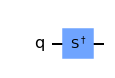

In [115]:
sdg_gate = QuantumCircuit(1)
sdg_gate.sdg(0)
sdg_gate.draw(output='mpl')

### Standard Rotations

The standard rotation gates are those that define rotations around the Paulis $P=\{X,Y,Z\}$. They are defined as 

$$ R_P(\theta) = \exp(-i \theta P/2) = \cos(\theta/2)I -i \sin(\theta/2)P$$

#### Rotation around X-axis

$$
R_x(\theta) = 
\begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2)\\
-i\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix} = u3(\theta, -\pi/2,\pi/2)
$$

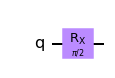

In [116]:
rx_gate = QuantumCircuit(1)
rx_gate.rx(np.pi/2,0)
rx_gate.draw(output='mpl')

#### Rotation around Y-axis

$$
R_y(\theta) =
\begin{pmatrix}
\cos(\theta/2) & - \sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2).
\end{pmatrix} =u3(\theta,0,0)
$$

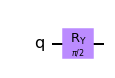

In [117]:
ry_gate = QuantumCircuit(1)
ry_gate.ry(np.pi/2,0)
ry_gate.draw(output='mpl')

#### Rotation around Z-axis

$$
R_z(\phi) = 
\begin{pmatrix}
e^{-i \phi/2} & 0 \\
0 & e^{i \phi/2}
\end{pmatrix}\equiv u1(\phi)
$$

Note that here we have used an equivalent as it is different to u1 by a global phase $e^{-i \phi/2}$.

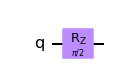

In [118]:
rz_gate = QuantumCircuit(1)
rz_gate.rz(np.pi/2,0)
rz_gate.draw(output='mpl')

## Multi-Qubit Gates <a name="multi_gates"/>

### Mathematical Preliminaries

The space of a quantum computer grows exponentially with the number of qubits. For $n$ qubits the complex vector space has dimension $d=2^n$. To describe states of a multi-qubit system, the tensor product is used to "glue together" operators and basis vectors.

Let's start by considering a 2-qubit system. Given two operators $A$ and $B$ that each act on one qubit, the joint operator $A \otimes B$ acting on two qubits is

$$\begin{equation}
	A\otimes B = 
	\begin{pmatrix} 
		A_{00} \begin{pmatrix} 
			B_{00} & B_{01} \\
			B_{10} & B_{11}
		\end{pmatrix} & A_{01} 	\begin{pmatrix} 
				B_{00} & B_{01} \\
				B_{10} & B_{11}
			\end{pmatrix} \\
		A_{10} 	\begin{pmatrix} 
					B_{00} & B_{01} \\
					B_{10} & B_{11}
				\end{pmatrix} & A_{11} 	\begin{pmatrix} 
							B_{00} & B_{01} \\
							B_{10} & B_{11}
						\end{pmatrix}
	\end{pmatrix},						
\end{equation}$$

where $A_{jk}$ and $B_{lm}$ are the matrix elements of $A$ and $B$, respectively.

Analogously, the basis vectors for the 2-qubit system are formed using the tensor product of basis vectors for a single qubit:
$$\begin{equation}\begin{split}
	\left|{00}\right\rangle &= \begin{pmatrix} 
		1 \begin{pmatrix} 
			1  \\
			0
		\end{pmatrix} \\
		0 \begin{pmatrix} 
			1  \\
			0 
		\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\0 \end{pmatrix}~~~\left|{01}\right\rangle = \begin{pmatrix} 
	1 \begin{pmatrix} 
	0 \\
	1
	\end{pmatrix} \\
	0 \begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix}0 \\ 1 \\ 0 \\ 0 \end{pmatrix}\end{split}
\end{equation}$$
    
$$\begin{equation}\begin{split}\left|{10}\right\rangle = \begin{pmatrix} 
	0\begin{pmatrix} 
	1  \\
	0
	\end{pmatrix} \\
	1\begin{pmatrix} 
	1 \\
	0 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}~~~ 	\left|{11}\right\rangle = \begin{pmatrix} 
	0 \begin{pmatrix} 
	0  \\
	1
	\end{pmatrix} \\
	1\begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\1 \end{pmatrix}\end{split}
\end{equation}.$$

Note we've introduced a shorthand for the tensor product of basis vectors, wherein $\left|0\right\rangle \otimes \left|0\right\rangle$ is written as $\left|00\right\rangle$. The state of an $n$-qubit system can be described using the $n$-fold tensor product of single-qubit basis vectors. Notice that the basis vectors for a 2-qubit system are 4-dimensional; in general, the basis vectors of an $n$-qubit sytsem are $2^{n}$-dimensional, as noted earlier.

### Basis vector ordering in Qiskit

Within the physics community, the qubits of a multi-qubit systems are typically ordered with the first qubit on the left-most side of the tensor product and the last qubit on the right-most side. For instance, if the first qubit is in state $\left|0\right\rangle$ and second is in state $\left|1\right\rangle$, their joint state would be $\left|01\right\rangle$. Qiskit uses a slightly different ordering of the qubits, in which the qubits are represented from the most significant bit (MSB) on the left to the least significant bit (LSB) on the right (big-endian). This is similar to bitstring representation on classical computers, and enables easy conversion from bitstrings to integers after measurements are performed. For the example just given, the joint state would be represented as $\left|10\right\rangle$. Importantly, *this change in the representation of multi-qubit states affects the way multi-qubit gates are represented in Qiskit*, as discussed below.

The representation used in Qiskit enumerates the basis vectors in increasing order of the integers they represent. For instance, the basis vectors for a 2-qubit system would be ordered as $\left|00\right\rangle$, $\left|01\right\rangle$, $\left|10\right\rangle$, and $\left|11\right\rangle$. Thinking of the basis vectors as bit strings, they encode the integers 0,1,2 and 3, respectively.


### Controlled operations on qubits

A common multi-qubit gate involves the application of a gate to one qubit, conditioned on the state of another qubit. For instance, we might want to flip the state of the second qubit when the first qubit is in $\left|0\right\rangle$. Such gates are known as _controlled gates_. The standard multi-qubit gates consist of two-qubit gates and three-qubit gates. The two-qubit gates are:
- controlled Pauli gates
- controlled Hadamard gate
- controlled rotation gates
- controlled phase gate
- controlled u3 gate
- swap gate

The three-qubit gates are: 
- Toffoli gate 
- Fredkin gate

## Two-qubit gates <a name="two_gates"/>

Most of the two-qubit gates are of the controlled type (the SWAP gate being the exception). In general, a controlled two-qubit gate $C_{U}$ acts to apply the single-qubit unitary $U$ to the second qubit when the state of the first qubit is in $\left|1\right\rangle$. Suppose $U$ has a matrix representation

$$U = \begin{pmatrix} u_{00} & u_{01} \\ u_{10} & u_{11}\end{pmatrix}.$$

We can work out the action of $C_{U}$ as follows. Recall that the basis vectors for a two-qubit system are ordered as $\left|00\right\rangle, \left|01\right\rangle, \left|10\right\rangle, \left|11\right\rangle$. Suppose the **control qubit** is **qubit 0** (which, according to Qiskit's convention, is one the _right-hand_ side of the tensor product). If the control qubit is in $\left|1\right\rangle$, $U$ should be applied to the **target** (qubit 1, on the _left-hand_ side of the tensor product). Therefore, under the action of $C_{U}$, the basis vectors are transformed according to

$$\begin{align*}
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{U\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{U\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
\end{align*}.$$

In matrix form, the action of $C_{U}$ is

$$\begin{equation}
	C_U = \begin{pmatrix}
	1 & 0 & 0 & 0 \\
	0 & u_{00} & 0 & u_{01} \\
	0 & 0 & 1 & 0 \\
	0 & u_{10} &0 & u_{11}
		\end{pmatrix}.
\end{equation}$$

To work out these matrix elements, let

$$C_{(jk), (lm)} = \left(\underset{\text{qubit}~1}{\left\langle j \right|} \otimes \underset{\text{qubit}~0}{\left\langle k \right|}\right) C_{U} \left(\underset{\text{qubit}~1}{\left| l \right\rangle} \otimes \underset{\text{qubit}~0}{\left| k \right\rangle}\right),$$

compute the action of $C_{U}$ (given above), and compute the inner products.

As shown in the examples below, this operation is implemented in Qiskit as `cU(q[0],q[1])`.


If **qubit 1 is the control and qubit 0 is the target**, then the basis vectors are transformed according to
$$\begin{align*}
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{U\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{U\left|1\right\rangle}\\
\end{align*},$$


which implies the matrix form of $C_{U}$ is
$$\begin{equation}
	C_U = \begin{pmatrix}
	1 & 0 & 0  & 0 \\
	0 & 1 & 0 & 0 \\
	0 & 0 & u_{00} & u_{01} \\
	0 & 0 & u_{10} & u_{11}
		\end{pmatrix}.
\end{equation}$$

### Controlled Pauli Gates

#### Controlled-X (or, controlled-NOT) gate
The controlled-not gate flips the `target` qubit when the control qubit is in the state $\left|1\right\rangle$. If we take the MSB as the control qubit (e.g. `cx(q[1],q[0])`), then the matrix would look like

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}. 
$$

However, when the LSB is the control qubit, (e.g. `cx(q[0],q[1])`), this gate is equivalent to the following matrix:

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0
\end{pmatrix}. 
$$

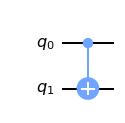

In [120]:
cx_gate = QuantumCircuit(2)
cx_gate.cx(0,1)
cx_gate.draw(output='mpl')

#### Controlled $Y$ gate

Apply the $Y$ gate to the target qubit if the control qubit is the MSB

$$
C_Y = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & -i\\
0 & 0 & i & 0
\end{pmatrix},
$$

or when the LSB is the control

$$
C_Y = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & -i\\
0 & 0 & 1 & 0\\
0 & i & 0 & 0
\end{pmatrix}.
$$

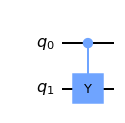

In [121]:
cy_gate = QuantumCircuit(2)
cy_gate.cy(0,1)
cy_gate.draw(output='mpl')

#### Controlled $Z$ (or, controlled Phase) gate

Similarly, the controlled Z gate flips the phase of the target qubit if the control qubit is $\left|1\right\rangle$. The matrix looks the same regardless of whether the MSB or LSB is the control qubit:

$$
C_Z = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1
\end{pmatrix}
$$


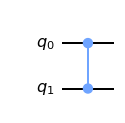

In [122]:
cz_gate = QuantumCircuit(2)
cz_gate.cz(0,1)
cz_gate.draw(output='mpl')

### Controlled $u3$ rotation

Perform controlled-$u3$ rotation on the target qubit if the control qubit (here LSB) is $\left|1\right\rangle$. 

$$
C_{u3}(\theta, \phi, \lambda) \equiv 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i(\phi+\lambda)/2}\cos(\theta/2) & 0 & -e^{-i(\phi-\lambda)/2}\sin(\theta/2)\\
0 & 0 & 1 & 0\\
0 & e^{i(\phi-\lambda)/2}\sin(\theta/2) & 0 & e^{i(\phi+\lambda)/2}\cos(\theta/2)
\end{pmatrix}.
$$

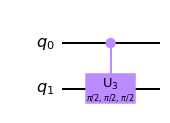

In [130]:
cu_gate = QuantumCircuit(2)
cu_gate.cu3(np.pi/2, np.pi/2, np.pi/2, 0, 1)
cu_gate.draw(output='mpl')

### SWAP gate

The SWAP gate exchanges the two qubits. It transforms the basis vectors as

$$\left|00\right\rangle \rightarrow \left|00\right\rangle~,~\left|01\right\rangle \rightarrow \left|10\right\rangle~,~\left|10\right\rangle \rightarrow \left|01\right\rangle~,~\left|11\right\rangle \rightarrow \left|11\right\rangle,$$

which gives a matrix representation of the form

$$
\mathrm{SWAP} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}.
$$

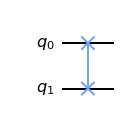

In [133]:
swap_gate = QuantumCircuit(2)
swap_gate.swap(0, 1)
swap_gate.draw(output='mpl')

## Non-unitary operations <a name="non_unitary"/>

Now that we have gone through all the unitary operations in quantum circuits, we also have access to non-unitary operations. These include measurements, reset of qubits, and classical conditional operations.

### Measurements

We don't have access to all the information when we make a measurement in a quantum computer. The quantum state is projected onto the standard basis. Below are two examples showing a circuit that is prepared in a basis state and the quantum computer prepared in a superposition state.

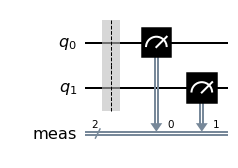

In [140]:
qc = QuantumCircuit(2)
qc.measure_all()
qc.draw(output='mpl')

### Reset
It is also possible to `reset` qubits to the $\left|0\right\rangle$ state in the middle of computation. Note that `reset` is not a Gate operation, since it is irreversible.

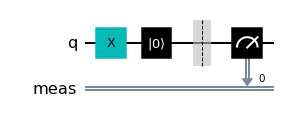

In [143]:
qc = QuantumCircuit(1)
qc.x(0)
qc.reset(0)
qc.measure_all()
qc.draw(output='mpl')

### Conditional operations
It is also possible to do operations conditioned on the state of the classical register

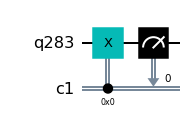

In [151]:
from qiskit import ClassicalRegister, QuantumRegister

q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.x(q[0]).c_if(c, 0)
qc.measure(0,0)
qc.draw(output='mpl')

## Arbitrary initialization <a name="initialization"/>
What if we want to initialize a qubit register to an arbitrary state? An arbitrary state for $n$ qubits may be specified by a vector of $2^n$ amplitudes, where the sum of amplitude-norms-squared equals 1. For example, the following three-qubit state can be prepared:

$$\left|\psi\right\rangle = \frac{i}{4}\left|000\right\rangle + \frac{1}{\sqrt{8}}\left|001\right\rangle + \frac{1+i}{4}\left|010\right\rangle + \frac{1+2i}{\sqrt{8}}\left|101\right\rangle + \frac{1}{4}\left|110\right\rangle$$

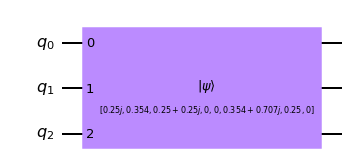

In [139]:
# Initializing a three-qubit quantum state
import math
desired_vector = [
    1 / math.sqrt(16) * complex(0, 1),
    1 / math.sqrt(8) * complex(1, 0),
    1 / math.sqrt(16) * complex(1, 1),
    0,
    0,
    1 / math.sqrt(8) * complex(1, 2),
    1 / math.sqrt(16) * complex(1, 0),
    0]


init_qc = QuantumCircuit(3)
init_qc.initialize(desired_vector, [0,1,2])
init_qc.draw(output='mpl')

# Part1 Exercise: Quantum State manipulating with the gates - Bell State


There are four Bell states given by 

$$ |\Phi^+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle\otimes |0\rangle + |1\rangle\otimes|1\rangle\right)$$ 
$$ |\Phi^-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle\otimes |0\rangle - |1\rangle\otimes|1\rangle\right)$$
$$ |\Psi^+\rangle = \frac{1}{\sqrt{2}} \left(|0\rangle\otimes |1\rangle + |1\rangle\otimes|0\rangle\right)$$
$$ |\Psi^-\rangle = \frac{1}{\sqrt{2}} \left(|0\rangle\otimes |1\rangle - |1\rangle\otimes|0\rangle\right)$$

Can you find circuits preparing all these four Bell states? Convince yourself that the Bell states are indeed orthogonal using the state_vector backend of Aer. We will see more details on running quantum circuit at Part2 so at here, just try to use below function to run the circuit.

In [164]:
# We prepare a similar function for running on the state vector simulator
def circuit_run(quantum_circuit, decimals=6):
    """Takes a circuit, and runs it on the state vector simulator backend."""
    statevector_simulator = Aer.get_backend('statevector_simulator')
    job = execute(quantum_circuit, backend=statevector_simulator)
    result = job.result()    
    statevector = result.get_statevector(quantum_circuit, decimals=decimals)
    return statevector

### The state $|\Phi^+\rangle$

|$\Phi^+$> = [0.707107+0.j 0.      +0.j 0.      +0.j 0.707107+0.j]


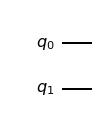

In [161]:
qc_phi_plus = QuantumCircuit(2)

#your code here

qc_phi_plus.draw(output='mpl')

In [158]:
# To obtain the statevector, we run on Aer's state vector simulator. Note, that there is no measurement at the end
# when running on the state vector simulator, as otherwise the state would collapse onto one of the computational
# basis states and we do not get the actual state vector prepared by the circuit
phi_plus_state = circuit_run(qc_phi_plus)
print('|Phi^+> =', phi_plus_state)

|Phi^+> = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]


### The state $|\Phi^-\rangle$
|$\Phi^-$> = [ 0.707107+0.j  0.      +0.j  0.      +0.j -0.707107-0.j]


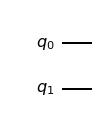

In [162]:
# Let us first prepare the Phi^- state
qc_phi_minus = QuantumCircuit(2)

#your code here

qc_phi_minus.draw(output='mpl')

In [163]:
# To obtain the statevector, we run on Aer's state vector simulator. Note, that there is no measurement at the end
# when running on the state vector simulator, as otherwise the state would collapse onto one of the computational
# basis states and we do not get the actual state vector prepared by the circuit
phi_minus_state = circuit_run(qc_phi_minus)
print('|Phi^-> =', phi_minus_state)

|Phi^-> = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]


### The state $|\Psi^+\rangle$
|$\Psi^+$> = [0.      +0.j 0.707107+0.j 0.707107+0.j 0.      +0.j]


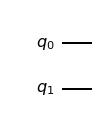

In [167]:
#The Psi^+ state
qc_psi_plus = QuantumCircuit(2)

#your code here

qc_psi_plus.draw(output='mpl')

In [166]:
psi_plus_state = run_on_statevector_simulator(qc_psi_plus)
print('|Psi^+> =', psi_plus_state)

|Psi^+> = [0.      +0.j 0.707107+0.j 0.707107+0.j 0.      +0.j]


### The state $|\Psi^-\rangle$
|$\Psi^-$> = [ 0.      +0.j -0.707107-0.j  0.707107+0.j  0.      +0.j]


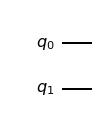

In [170]:
# Let us first prepare the Psi^- state
qc_psi_minus = QuantumCircuit(2)

#your code here

qc_psi_minus.draw(output='mpl')

In [169]:
psi_minus_state = run_on_statevector_simulator(qc_psi_minus)
print('|Psi^-> =', psi_minus_state)

|Psi^-> = [ 0.      +0.j -0.707107-0.j  0.707107+0.j  0.      +0.j]


In [173]:
### Check the orthogonality of the Bell states
print('|<Phi^+|Phi^+>|^2 =', state_fidelity(phi_plus_state, phi_plus_state))
print('|<Phi^+|Phi^->|^2 =', state_fidelity(phi_plus_state, phi_minus_state))
print('|<Phi^+|Psi^+>|^2 =', state_fidelity(phi_plus_state, psi_plus_state))
print('|<Phi^+|Psi^->|^2 =', state_fidelity(phi_plus_state, psi_minus_state))

print('|<Psi^+|Phi^+>|^2 =', state_fidelity(psi_plus_state, phi_plus_state))
print('|<Psi^+|Phi^->|^2 =', state_fidelity(psi_plus_state, phi_minus_state))
print('|<Psi^+|Psi^+>|^2 =', state_fidelity(psi_plus_state, psi_plus_state))
print('|<Psi^+|Psi^->|^2 =', state_fidelity(psi_plus_state, psi_minus_state))


|<Phi^+|Phi^+>|^2 = 1.0
|<Phi^+|Phi^->|^2 = 1.0
|<Phi^+|Psi^+>|^2 = 0.0
|<Phi^+|Psi^->|^2 = 0.0
|<Psi^+|Phi^+>|^2 = 0.0
|<Psi^+|Phi^->|^2 = 0.0
|<Psi^+|Psi^+>|^2 = 1.0000012377963834
|<Psi^+|Psi^->|^2 = 0.0


In [83]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

/Users/sophy/opt/anaconda3/envs/qiskit/lib/python3.9/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
